In [2]:
import numpy as np
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [709]:
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 144

Text(0.5, 1.0, 'Directed')

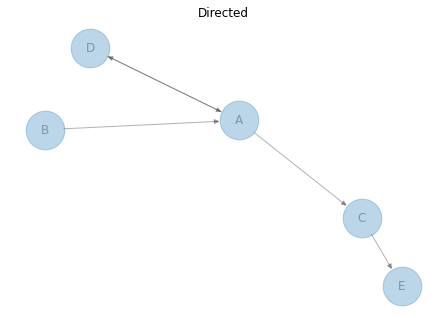

In [5]:
# ------- DIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})
 
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("Directed") 

Text(0.5, 1.0, 'UN-Directed')

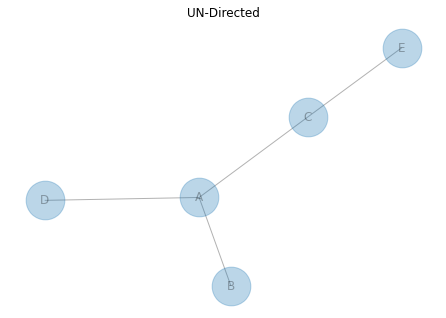

In [7]:
# ------- UNDIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})
 
# Build your graph. Note that we use the Graph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3)
plt.title("UN-Directed")

In [4]:
file_path = '../Datos/payment-attempts.csv'
pay_att = pd.read_csv(file_path)

In [6]:
pay_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  54 non-null     int64 
 1   payment_index       54 non-null     int64 
 2   payment_hash        54 non-null     object
 3   payment_preimage    54 non-null     object
 4   payment_request     53 non-null     object
 5   status              54 non-null     object
 6   value_msat          54 non-null     int64 
 7   fee_msat            54 non-null     int64 
 8   htlcs               54 non-null     object
 9   failure_reason      54 non-null     object
 10  creation_timestamp  54 non-null     object
 11  creation_time_ns    54 non-null     int64 
 12  created_on          54 non-null     object
 13  updated_on          52 non-null     object
dtypes: int64(5), object(9)
memory usage: 6.0+ KB


In [7]:
import json
from pandas import json_normalize

In [426]:
prueba = pay_att.loc[22, 'htlcs']
prueba

'[{"route": {"hops": [{"expiry": 744662, "chan_id": 805782594076999681, "pub_key": "03a503d8e30f2ff407096d235b5db63b4fcf3f89a653acb6f43d3fc492a7674019", "tlv_payload": true, "chan_capacity": 9000000, "amt_to_forward": 500375, "amt_to_forward_msat": 500375000}, {"fee": 375, "expiry": 744622, "chan_id": 802729250315632641, "pub_key": "031678745383bd273b4c3dbefc8ffbf4847d85c2f62d3407c0c980430b3257c403", "fee_msat": 375000, "tlv_payload": true, "chan_capacity": 10000000, "amt_to_forward": 500000, "amt_to_forward_msat": 500000000}, {"expiry": 744622, "chan_id": 719759003306622976, "pub_key": "035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8cbc711002ba215bfc226", "mpp_record": {"payment_addr": "/TJWFVYhvZUEm5c4x17RFjG++8W/cyPOagLnE8dEZdY=", "total_amt_msat": 500000000}, "tlv_payload": true, "chan_capacity": 4000000, "amt_to_forward": 500000, "amt_to_forward_msat": 500000000}], "total_amt": 500375, "total_fees": 375, "total_amt_msat": 500375000, "total_fees_msat": 375000, "total_time_lock": 744

In [427]:
htlc_json = json.loads(prueba)

In [428]:
htlc_json

[{'route': {'hops': [{'expiry': 744662,
     'chan_id': 805782594076999681,
     'pub_key': '03a503d8e30f2ff407096d235b5db63b4fcf3f89a653acb6f43d3fc492a7674019',
     'tlv_payload': True,
     'chan_capacity': 9000000,
     'amt_to_forward': 500375,
     'amt_to_forward_msat': 500375000},
    {'fee': 375,
     'expiry': 744622,
     'chan_id': 802729250315632641,
     'pub_key': '031678745383bd273b4c3dbefc8ffbf4847d85c2f62d3407c0c980430b3257c403',
     'fee_msat': 375000,
     'tlv_payload': True,
     'chan_capacity': 10000000,
     'amt_to_forward': 500000,
     'amt_to_forward_msat': 500000000},
    {'expiry': 744622,
     'chan_id': 719759003306622976,
     'pub_key': '035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8cbc711002ba215bfc226',
     'mpp_record': {'payment_addr': '/TJWFVYhvZUEm5c4x17RFjG++8W/cyPOagLnE8dEZdY=',
      'total_amt_msat': 500000000},
     'tlv_payload': True,
     'chan_capacity': 4000000,
     'amt_to_forward': 500000,
     'amt_to_forward_msat': 500000000}],


In [429]:
json_normalize(htlc_json)

,status,attempt_id,attempt_time_ns,resolve_time_ns,route.hops,route.total_amt,route.total_fees,route.total_amt_msat,route.total_fees_msat,route.total_time_lock,...,failure.channel_update.timestamp,failure.channel_update.chain_hash,failure.channel_update.message_flags,failure.channel_update.time_lock_delta,failure.channel_update.htlc_maximum_msat,failure.channel_update.htlc_minimum_msat,failure.failure_source_index,failure.channel_update.base_fee,failure.channel_update.channel_flags,preimage
0,2,256583,1657553716352621051,1657553717322560564,"[{'expiry': 744662, 'chan_id': 805782594076999...",500375,375,500375000,375000,744734,...,1.657539e+09,b+KMCrbxs3LBpqJGrmP3T5Meg2XhWgicaNYZAAAAAAA=,1.0,40.0,3.960000e+09,1000.0,2.0,NaN,NaN,NaN
1,2,256584,1657553717944855861,1657553719748067149,"[{'fee': 76, 'expiry': 744846, 'chan_id': 8057...",500433,433,500433007,433007,744918,...,1.657539e+09,b+KMCrbxs3LBpqJGrmP3T5Meg2XhWgicaNYZAAAAAAA=,1.0,144.0,7.920000e+09,1000.0,4.0,400.0,1.0,NaN
2,2,256585,1657553719982635708,1657553722236372774,"[{'fee': 76, 'expiry': 744776, 'chan_id': 8057...",500372,372,500372572,372572,744848,...,1.657500e+09,b+KMCrbxs3LBpqJGrmP3T5Meg2XhWgicaNYZAAAAAAA=,1.0,34.0,9.900000e+09,1.0,4.0,NaN,1.0,NaN
3,1,256586,1657553722540221422,1657553724002541154,"[{'fee': 76, 'expiry': 744702, 'chan_id': 8057...",500380,380,500380072,380072,744774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYRncyHCoAENu5IczPJHShd0M/Sb5aJy/hJQ93aLeD4=


In [430]:
json_normalize(htlc_json[0]['route']['hops'])

,expiry,chan_id,pub_key,tlv_payload,chan_capacity,amt_to_forward,amt_to_forward_msat,fee,fee_msat,mpp_record.payment_addr,mpp_record.total_amt_msat
0,744662,805782594076999681,03a503d8e30f2ff407096d235b5db63b4fcf3f89a653ac...,True,9000000,500375,500375000,NaN,NaN,NaN,NaN
1,744622,802729250315632641,031678745383bd273b4c3dbefc8ffbf4847d85c2f62d34...,True,10000000,500000,500000000,375.0,375000.0,NaN,NaN
2,744622,719759003306622976,035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...,True,4000000,500000,500000000,NaN,NaN,/TJWFVYhvZUEm5c4x17RFjG++8W/cyPOagLnE8dEZdY=,500000000.0


**Creating MiltiIndex dataframe**

First level will be the payment id <br>
Second level will be the route attempts

In [444]:
d = {}

for i, p in pay_att.iterrows():
    i_d = p['id']
    val = p['value_msat']
    htlc_json = json.loads(p['htlcs'])
    htlc_atts = json_normalize(htlc_json)
#     amt = htlc_atts.loc[0, 'route.total_amt_msat']

    for ix, row in htlc_atts.iterrows():
        
        try:
            failed = row['failure.failure_source_index']
        except:
            failed = np.nan
        
        # the path succeeded?
        status = row['status']
        
        hops = json_normalize(row['route.hops'])
        for h_ix, h in hops.iterrows():
            chan_id = h['chan_id']
            p_key = h['pub_key']
            try:
                fee_msat = h['fee_msat']
            except:
                fee_msat = 0
            
            if failed ==h_ix:
                d[(i_d, ix, h_ix)] = [chan_id, p_key, fee_msat, True, status]
            else:
                d[(i_d, ix, h_ix)] = [chan_id, p_key, fee_msat, False, status]
            
                
            

        

In [445]:
d

{(6577, 0, 0): [774770868577435649,
  '022eb09a7993a0edde69537b420f4119c0de833e0ee47651753b46bf884db75235',
  25000.0,
  False,
  2.0],
 (6577, 0, 1): [818066337947451393,
  '038fe1bd966b5cb0545963490c631eaa1924e2c4c0ea4e7dcb5d4582a1e7f2f1a5',
  nan,
  False,
  2.0],
 (6577, 0, 2): [806562147822862337,
  '03d29a2fc370cf011a743d893de86ab9a920f2445539ea46db2186d9b95183f67c',
  nan,
  False,
  2.0],
 (6577, 0, 3): [791128303121137665,
  '035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8cbc711002ba215bfc226',
  nan,
  True,
  2.0],
 (6577, 1, 0): [774770868577435649,
  '022eb09a7993a0edde69537b420f4119c0de833e0ee47651753b46bf884db75235',
  25000.0,
  False,
  2.0],
 (6577, 1, 1): [818066337947451393,
  '038fe1bd966b5cb0545963490c631eaa1924e2c4c0ea4e7dcb5d4582a1e7f2f1a5',
  nan,
  False,
  2.0],
 (6577, 1, 2): [817487994849132545,
  '023d153b512346a3a6026859ecf906d7f6912bc9fa4214ed4439ffafe47ba53cef',
  nan,
  False,
  2.0],
 (6577, 1, 3): [773157885054287873,
  '035e4ff418fc8b5554c5d9eea66396

In [446]:
payment_atts = pd.DataFrame(index=d.keys(), data=d.values())

In [447]:
payment_atts.columns = ['chan_id', 'pub_key', 'fee_msat', 'hop_fail', 'pay_status']

In [448]:
payment_atts

chan_id  \
6577 0  0  774770868577435649   
        1  818066337947451393   
        2  806562147822862337   
        3  791128303121137665   
     1  0  774770868577435649   
...                       ...   
6630 26 1  750057145744424961   
        2  721103706067959809   
     27 0  778288206261059585   
        1  816698545456480257   
        2  817010806803070983   

                                                     pub_key  fee_msat  \
6577 0  0  022eb09a7993a0edde69537b420f4119c0de833e0ee476...   25000.0   
        1  038fe1bd966b5cb0545963490c631eaa1924e2c4c0ea4e...       NaN   
        2  03d29a2fc370cf011a743d893de86ab9a920f2445539ea...       NaN   
        3  035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...       NaN   
     1  0  022eb09a7993a0edde69537b420f4119c0de833e0ee476...   25000.0   
...                                                      ...       ...   
6630 26 1  02f6155b106a9f92a13738833ec7e25da58fab1fdef3ac...   18628.0   
        2  035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...       NaN   
     27 0  036b53093df5a932deac828cca6d663472dbc88322b05e...   90998.0   
        1  02e4971e61a3f55718ae31e2eed19aaf2e32caf3eb5ef5...   20927.0   
        2  035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...       NaN   

           hop_fail  pay_status  
6577 0  0     False         2.0  
        1     False         2.0  
        2     False         2.0  
        3      True         2.0  
     1  0     False         2.0  
...             ...         ...  
6630 26 1      True         2.0  
        2     False         2.0  
     27 0     False         2.0  
        1      True         2.0  
        2     False         2.0  

[2908 rows x 5 columns]

In [449]:
payment_atts.index.set_names(['payment_id', 'attempt', 'hop'], inplace=True)

In [450]:
payment_atts

chan_id  \
payment_id attempt hop                       
6577       0       0    774770868577435649   
                   1    818066337947451393   
                   2    806562147822862337   
                   3    791128303121137665   
           1       0    774770868577435649   
...                                    ...   
6630       26      1    750057145744424961   
                   2    721103706067959809   
           27      0    778288206261059585   
                   1    816698545456480257   
                   2    817010806803070983   

                                                                  pub_key  \
payment_id attempt hop                                                      
6577       0       0    022eb09a7993a0edde69537b420f4119c0de833e0ee476...   
                   1    038fe1bd966b5cb0545963490c631eaa1924e2c4c0ea4e...   
                   2    03d29a2fc370cf011a743d893de86ab9a920f2445539ea...   
                   3    035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...   
           1       0    022eb09a7993a0edde69537b420f4119c0de833e0ee476...   
...                                                                   ...   
6630       26      1    02f6155b106a9f92a13738833ec7e25da58fab1fdef3ac...   
                   2    035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...   
           27      0    036b53093df5a932deac828cca6d663472dbc88322b05e...   
                   1    02e4971e61a3f55718ae31e2eed19aaf2e32caf3eb5ef5...   
                   2    035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...   

                        fee_msat  hop_fail  pay_status  
payment_id attempt hop                                  
6577       0       0     25000.0     False         2.0  
                   1         NaN     False         2.0  
                   2         NaN     False         2.0  
                   3         NaN      True         2.0  
           1       0     25000.0     False         2.0  
...                          ...       ...         ...  
6630       26      1     18628.0      True         2.0  
                   2         NaN     False         2.0  
           27      0     90998.0     False         2.0  
                   1     20927.0      True         2.0  
                   2         NaN     False         2.0  

[2908 rows x 5 columns]

In [489]:
p1 = payment_atts.loc[(6599),:]

In [490]:
# add node alias

In [482]:
file_name = '../Datos/graph_metrics_2022-07-11.json'
graph_data = open(file_name, encoding='utf8')
graph_json = json.load(graph_data)
# converting data to pd dfs
nodes_graph = json_normalize(graph_json['nodes'])

In [483]:
def add_node_alias(df, nodes):

    
    df['node_alias'] = ''

    nodes_pubkeys = df['pub_key'].unique()
    
    for i in nodes_pubkeys:
        
        for ix, j in nodes[['pub_key', 'alias']].iterrows():
            
            if i == j['pub_key']:
                df.loc[df['pub_key'] == i, 'node_alias'] = j['alias']

                break    
    return df['node_alias']

In [491]:
add_node_alias(p1, nodes_graph)

attempt  hop
0        0                         Milky Way
         1            lightning-roulette.com
         2               WalletOfSatoshi.com
1        0                         Milky Way
         1                   SWISS.SOVEREIGN
         2                HoernchenLightning
         3                    indomitusBTC⚡️
         4               WalletOfSatoshi.com
2        0                         Milky Way
         1                   SWISS.SOVEREIGN
         2                HoernchenLightning
         3            zero fee routing | CLN
         4      BitcoinFTM.com aka The Lorax
         5               WalletOfSatoshi.com
3        0                         Milky Way
         1                   SWISS.SOVEREIGN
         2                    DiamondHands💎🙌
         3               WalletOfSatoshi.com
Name: node_alias, dtype: object

In [492]:
p1

chan_id  \
attempt hop                       
0       0    805782594076999681   
        1    802729250315632641   
        2    719759003306622976   
1       0    805782594076999681   
        1    755504126323064833   
        2    810682017883619328   
        3    770589425847107585   
        4    784913863321518081   
2       0    805782594076999681   
        1    755504126323064833   
        2    810682017883619328   
        3    802335625159573505   
        4    810313681463803905   
        5    780830277216567297   
3       0    805782594076999681   
        1    755504126323064833   
        2    798852372307902468   
        3    817624334332002311   

                                                       pub_key  fee_msat  \
attempt hop                                                                
0       0    03a503d8e30f2ff407096d235b5db63b4fcf3f89a653ac...       NaN   
        1    031678745383bd273b4c3dbefc8ffbf4847d85c2f62d34...  375000.0   
        2    035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...       NaN   
1       0    03a503d8e30f2ff407096d235b5db63b4fcf3f89a653ac...   76554.0   
        1    03d4e028a0d4a90868ec202ab684fb0085779defea9ca7...   41025.0   
        2    03cda3c7f11c0f63806b4910c7e00d133bc942fe66512f...   55028.0   
        3    03dc13c8c4b2ad8397855cf377fc34085ffbf816ef85df...  260400.0   
        4    035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...       NaN   
2       0    03a503d8e30f2ff407096d235b5db63b4fcf3f89a653ac...   76545.0   
        1    03d4e028a0d4a90868ec202ab684fb0085779defea9ca7...   41020.0   
        2    03cda3c7f11c0f63806b4910c7e00d133bc942fe66512f...   15007.0   
        3    038fe1bd966b5cb0545963490c631eaa1924e2c4c0ea4e...       NaN   
        4    032a54b1e9cd2ff8ec5f58915a749cf074e957006e8b4d...  240000.0   
        5    035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...       NaN   
3       0    03a503d8e30f2ff407096d235b5db63b4fcf3f89a653ac...   76546.0   
        1    03d4e028a0d4a90868ec202ab684fb0085779defea9ca7...   52526.0   
        2    035b1ff29e8db1ba8f2a4f4f95db239b54069cb949b8cd...  251000.0   
        3    035e4ff418fc8b5554c5d9eea66396c227bd429a3251c8...       NaN   

             hop_fail  pay_status                    node_alias  
attempt hop                                                      
0       0       False         2.0                     Milky Way  
        1       False         2.0        lightning-roulette.com  
        2        True         2.0           WalletOfSatoshi.com  
1       0       False         2.0                     Milky Way  
        1       False         2.0               SWISS.SOVEREIGN  
        2       False         2.0            HoernchenLightning  
        3       False         2.0                indomitusBTC⚡️  
        4        True         2.0           WalletOfSatoshi.com  
2       0       False         2.0                     Milky Way  
        1       False         2.0               SWISS.SOVEREIGN  
        2       False         2.0            HoernchenLightning  
        3       False         2.0        zero fee routing | CLN  
        4        True         2.0  BitcoinFTM.com aka The Lorax  
        5       False         2.0           WalletOfSatoshi.com  
3       0       False         1.0                     Milky Way  
        1       False         1.0               SWISS.SOVEREIGN  
        2       False         1.0                DiamondHands💎🙌  
        3       False         1.0           WalletOfSatoshi.com

In [493]:
p1.iloc[-1].name


(3, 3)

In [458]:
graph_df = pd.DataFrame(index=range(p1.shape[0] - p1.iloc[-1].name[0] - 1), 
                        columns=['source', 'destination', 'weight', 'fail_weight', 'successful_path'])

In [459]:
# setting sources
c = 0
for i, hop in p1.iterrows():
    if i[1] != (p1.index[-1][1]):
        graph_df.loc[c, 'source'] = hop['node_alias']
        c += 1

In [460]:
# setting destinations
c = 0

for i, hop in p1.iterrows():

    if i[1] != (p1.index[-1][1]):
        # dest
        graph_df.loc[c, 'destination'] = p1.loc[(i[0], i[1]+1), 'node_alias']
        # where it failed
        graph_df.loc[c, 'fail_weight'] = p1.loc[(i[0], i[1]+1), 'hop_fail']
        c += 1

KeyError: (0, 3)

In [151]:
graph_df

,source,destination,weight,fail_weight
0,Ngu Technologies,zero fee routing | CLN,NaN,False
1,zero fee routing | CLN,₿itcoin-⚡️,NaN,False
2,₿itcoin-⚡️,WalletOfSatoshi.com,NaN,True
3,Ngu Technologies,zero fee routing | CLN,NaN,False
4,zero fee routing | CLN,zero fee routing [TigerNode],NaN,False
5,zero fee routing [TigerNode],WalletOfSatoshi.com,NaN,True
6,Ngu Technologies,zero fee routing | CLN,NaN,False
7,zero fee routing | CLN,BtcPins.com,NaN,False
8,BtcPins.com,WalletOfSatoshi.com,NaN,True
9,Ngu Technologies,zero fee routing | CLN,NaN,False


In [189]:
hops = list(zip(graph_df.source, graph_df.destination, graph_df.fail_weight))

In [190]:
# weight
occur = dict()
for h in hops:
    
    occur[h[0:2]] = occur.get(h[0:2], 0) + 1

In [193]:
# fail weight
fs = dict()
for s, d, f in hops:
    if f:
        fs[(s,d)] = fs.get((s,d), 0) + 1

In [198]:
fs

{('₿itcoin-⚡️', 'WalletOfSatoshi.com'): 1,
 ('zero fee routing [TigerNode]', 'WalletOfSatoshi.com'): 1,
 ('BtcPins.com', 'WalletOfSatoshi.com'): 1,
 ('03a893c133cbb14ec3d4', 'WalletOfSatoshi.com'): 1,
 ('NERV', 'WalletOfSatoshi.com'): 1,
 ('tippin.me', 'WalletOfSatoshi.com'): 1,
 ('LOUDCHASER', 'WalletOfSatoshi.com'): 1,
 ('VitaRay', 'WalletOfSatoshi.com'): 1}

In [199]:
routes = graph_df.drop_duplicates()

In [200]:
routes['weight'] = occur.values()

In [202]:
for k in fs:
    source = routes['source'] == k[0]
    dest = routes['destination'] == k[1]
    routes.loc[source & dest, 'fail_weight'] = fs[k]

In [205]:
routes.replace(to_replace=False, value=0, inplace=True)

In [206]:
# normalize weight
routes['weight'] = (routes.weight-routes.weight.min())/(routes.weight.max()-routes.weight.min())
# normalize fail_weight
routes['fail_weight'] = (routes.fail_weight-routes.fail_weight.min())/(routes.fail_weight.max()-routes.fail_weight.min())

In [207]:
routes

,source,destination,weight,fail_weight
0,Ngu Technologies,zero fee routing | CLN,1.0,0.0
1,zero fee routing | CLN,₿itcoin-⚡️,0.0,0.0
2,₿itcoin-⚡️,WalletOfSatoshi.com,0.0,1.0
4,zero fee routing | CLN,zero fee routing [TigerNode],0.0,0.0
5,zero fee routing [TigerNode],WalletOfSatoshi.com,0.0,1.0
7,zero fee routing | CLN,BtcPins.com,0.0,0.0
8,BtcPins.com,WalletOfSatoshi.com,0.0,1.0
10,zero fee routing | CLN,03a893c133cbb14ec3d4,0.0,0.0
11,03a893c133cbb14ec3d4,WalletOfSatoshi.com,0.0,1.0
13,zero fee routing | CLN,NERV,0.0,0.0


In [208]:
G = nx.from_pandas_edgelist(routes, source='source', target='destination',
                            edge_attr=['weight', 'fail_weight'])

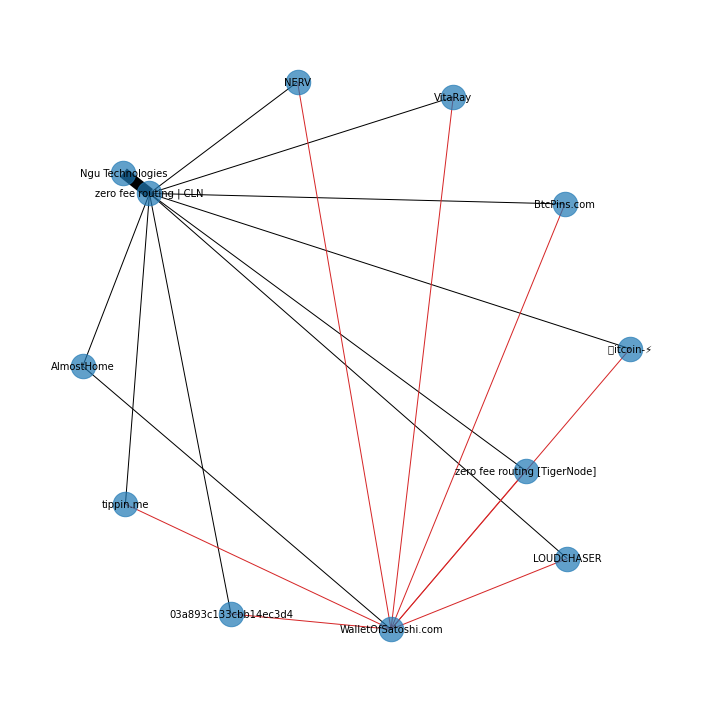

In [215]:
plt.figure(figsize=(10,10))

# G is our graph. It already has the edges and nodes attributes.
widths = np.array([w for *_, w in G.edges.data('weight')])
colors = np.array(['tab:red' if w >=1 else 'black' for *_, w in G.edges.data('fail_weight') ])

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibi

# nodes
nx.draw_networkx_nodes(G, pos, node_size=600, alpha=0.7)

# edges
nx.draw_networkx_edges(G, pos, width=(widths+0.1)*10, edge_color=colors)  

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

In [210]:
colors

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0.])

In [740]:
def show_routes_of_payment(payment_df, nodes_df=nodes_graph):
    """
    Displays the routes a payment has tried to get to its destination.
    
    Red edges represent that a payment has failed in that channel.
    Edges thickness simulates how often a payment tries that channel as part of its route.
    
    """
    # adding nodes alias: this is useful for node labels in the graph
    add_node_alias(payment_df, nodes_df)
    
    # creating the graph df:
    graph_df = pd.DataFrame(index=range(payment_df.shape[0] - payment_df.iloc[-1].name[0] - 1), 
                        columns=['source', 'destination', 'weight', 'fail_weight', 'pay_status'])
    
    # for setting sources and dests
    l =[]
    subl = []
    c = 0

    ixs = payment_df.index
    lenixs = len(ixs)

    for t in ixs[1:]:

        if ixs[c][0] != t[0]:
            l.append(subl.copy())
            subl.clear()

        subl.append(t[1])

        c += 1
        if c == lenixs - 1:
            l.append(subl.copy())
        
    ixs = [[max(e)] * (max(e) + 1)  for e in l]
    use = ixs[0]
    [use.extend(e) for e in ixs[1:]]
    
    # setting sources
    c = 0
    c2 =0
    for i, hop in payment_df.iterrows():
        if c2 == len(use):break
        if i[1] != (use[c2]):
            graph_df.loc[c, 'source'] = hop['node_alias']
            c += 1
        c2+=1

    # setting destinations
    c = 0
    c2 = 0
    for i, hop in payment_df.iterrows():
        if c2 == len(use):break
        if i[1] != (use[c2]):
            # dest
            
            graph_df.loc[c, 'destination'] = payment_df.loc[(i[0], i[1]+1), 'node_alias']
            # where it failed
            graph_df.loc[c, 'fail_weight'] = payment_df.loc[(i[0], i[1]+1), 'hop_fail']
            c += 1
        c2+=1

    # setting weights
    hops = list(zip(graph_df.source, graph_df.destination, graph_df.fail_weight))
    
    # occurences weight: this is for the edges thickness
    occur = dict()
    for h in hops:
        occur[h[0:2]] = occur.get(h[0:2], 0) + 1
    
    # fail weight: for the edges color
    fs = dict()
    for s, d, f in hops:
        if f:
            fs[(s,d)] = fs.get((s,d), 0) + 1
    
    # add status
    
    p_status = payment_df.groupby(level='attempt')['pay_status'].max()
    hops_index = payment_df.index.get_level_values(level=1).tolist()
    mult_factor =[hops_index[i-1] for i in range(len(hops_index)) if hops_index[i-1] > hops_index[i]]
    mult_factor = mult_factor[1:] + mult_factor[:1]
    
    status = []
    for fact, stat in zip(mult_factor, p_status):
        status = status + [stat] * fact
    status
    
    graph_df['pay_status'] = status
    
    # droping duplicates
    routes = graph_df.drop_duplicates(subset=['source', 'destination'])

    # adding weights to the df
    routes['weight'] = occur.values()
    for k in fs:
        source = routes['source'] == k[0]
        dest = routes['destination'] == k[1]
        routes.loc[source & dest, 'fail_weight'] = fs[k]
    
    routes.replace(to_replace=False, value=0, inplace=True)
#     routes_normalized = routes.copy()
#     # normalize weight
#     routes_normalized['weight'] = (routes.weight-routes.weight.min())/(routes.weight.max()-routes.weight.min())
#     # normalize fail_weight
#     routes_normalized['fail_weight'] = (routes.fail_weight-routes.fail_weight.min())/(routes.fail_weight.max()-routes.fail_weight.min())
    
#     ln_peer = routes_normalized.iloc[0,0]
#     new_row = {'source': 'LN_Capital', 'destination': ln_peer, 'weight': 0.1, 'fail_weight':0, 'pay_status':2}
#     routes_normalized = routes_normalized.append(new_row, ignore_index=True)
    
#     # creating graph form graph df
#     G = nx.from_pandas_edgelist(routes_normalized, source='source', target='destination',
#                             edge_attr=['weight', 'fail_weight', 'pay_status'])
    
#     nx.set_node_attributes(G, 'green', 'color')
#     # sender (our node)
#     G.nodes['LN_Capital']['color'] = 'yellow'
#     # destination 
#     node_dest = routes_normalized.iloc[-2,1]
#     G.nodes[node_dest]['color'] = 'purple'
    
#     # displaying graph
#     plt.figure(figsize=(15,15))

#     widths = np.array([w for *_, w in G.edges.data('weight')])

#     pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibi

#     # nodes
#     node_colors = np.array([col for *_, col in G.nodes.data('color')])
#     nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.7, node_color=node_colors)

#     # edges
#     colors = np.array(['tab:red' if w[2] >=1 else 'green' if s[2] == 1 else 'black' for w, s in zip(G.edges.data('fail_weight'), 
#                                                                        G.edges.data('pay_status'))])
#     nx.draw_networkx_edges(G, pos, width=(widths+0.1)*8, edge_color=colors)  # using a 8x scale factor here
    
#     # labels
#     nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

#     ax = plt.gca()
#     ax.margins(0.08)
#     plt.axis("off")
#     plt.tight_layout()
    
    return routes #, routes_normalized

In [858]:
show_routes_of_payment(payment_atts.loc[(6577),:])

,source,destination,weight,fail_weight,pay_status
0,Ngu Technologies,zero fee routing | CLN,9,0,2.0
1,zero fee routing | CLN,₿itcoin-⚡️,1,0,2.0
2,₿itcoin-⚡️,WalletOfSatoshi.com,1,1,2.0
4,zero fee routing | CLN,zero fee routing [TigerNode],1,0,2.0
5,zero fee routing [TigerNode],WalletOfSatoshi.com,1,1,2.0
7,zero fee routing | CLN,BtcPins.com,1,0,2.0
8,BtcPins.com,WalletOfSatoshi.com,1,1,2.0
10,zero fee routing | CLN,03a893c133cbb14ec3d4,1,0,2.0
11,03a893c133cbb14ec3d4,WalletOfSatoshi.com,1,1,2.0
13,zero fee routing | CLN,NERV,1,0,2.0


In [741]:
g_df = show_routes_of_payment(payment_atts.loc[(6599),:])

In [742]:
g_df

,source,destination,weight,fail_weight,pay_status
0,Milky Way,lightning-roulette.com,1,0,2.0
1,lightning-roulette.com,WalletOfSatoshi.com,1,1,2.0
2,Milky Way,SWISS.SOVEREIGN,3,0,2.0
3,SWISS.SOVEREIGN,HoernchenLightning,2,0,2.0
4,HoernchenLightning,indomitusBTC⚡️,1,0,2.0
5,indomitusBTC⚡️,WalletOfSatoshi.com,1,1,2.0
8,HoernchenLightning,zero fee routing | CLN,1,0,2.0
9,zero fee routing | CLN,BitcoinFTM.com aka The Lorax,1,1,2.0
10,BitcoinFTM.com aka The Lorax,WalletOfSatoshi.com,1,0,2.0
12,SWISS.SOVEREIGN,DiamondHands💎🙌,1,0,1.0


In [739]:
r_df

,source,destination,weight,fail_weight,pay_status
0,Milky Way,lightning-roulette.com,0.0,0.0,2.0
1,lightning-roulette.com,WalletOfSatoshi.com,0.0,1.0,2.0
2,Milky Way,SWISS.SOVEREIGN,1.0,0.0,2.0
3,SWISS.SOVEREIGN,HoernchenLightning,0.5,0.0,2.0
4,HoernchenLightning,indomitusBTC⚡️,0.0,0.0,2.0
5,indomitusBTC⚡️,WalletOfSatoshi.com,0.0,1.0,2.0
6,HoernchenLightning,zero fee routing | CLN,0.0,0.0,2.0
7,zero fee routing | CLN,BitcoinFTM.com aka The Lorax,0.0,1.0,2.0
8,BitcoinFTM.com aka The Lorax,WalletOfSatoshi.com,0.0,0.0,2.0
9,SWISS.SOVEREIGN,DiamondHands💎🙌,0.0,0.0,1.0


In [691]:
# creating graph form graph df
G = nx.from_pandas_edgelist(a_df, source='source', target='destination',
                        edge_attr=['weight', 'fail_weight', 'pay_status'])



In [699]:
G.nodes

NodeView(('okcoin', 'VIVA La Lightning', 'WalletOfSatoshi.com', '1sats.com ⚡ dm to connect', 'fixedfloat.com', 'ln.nicehash.com [Nicehash]', 'needleInTheHay', 'zero fee routing | CLN', 'LightningIsFreedom', 'eta', 'rompert.hashposition.com🔵', 'rappi node', 'hodlister_co', 'bitpay-inv1', 'Hippo Node', 'Dagobah', 'LN_Capital'))

{'color': 'yellow'}

['blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'yellow']


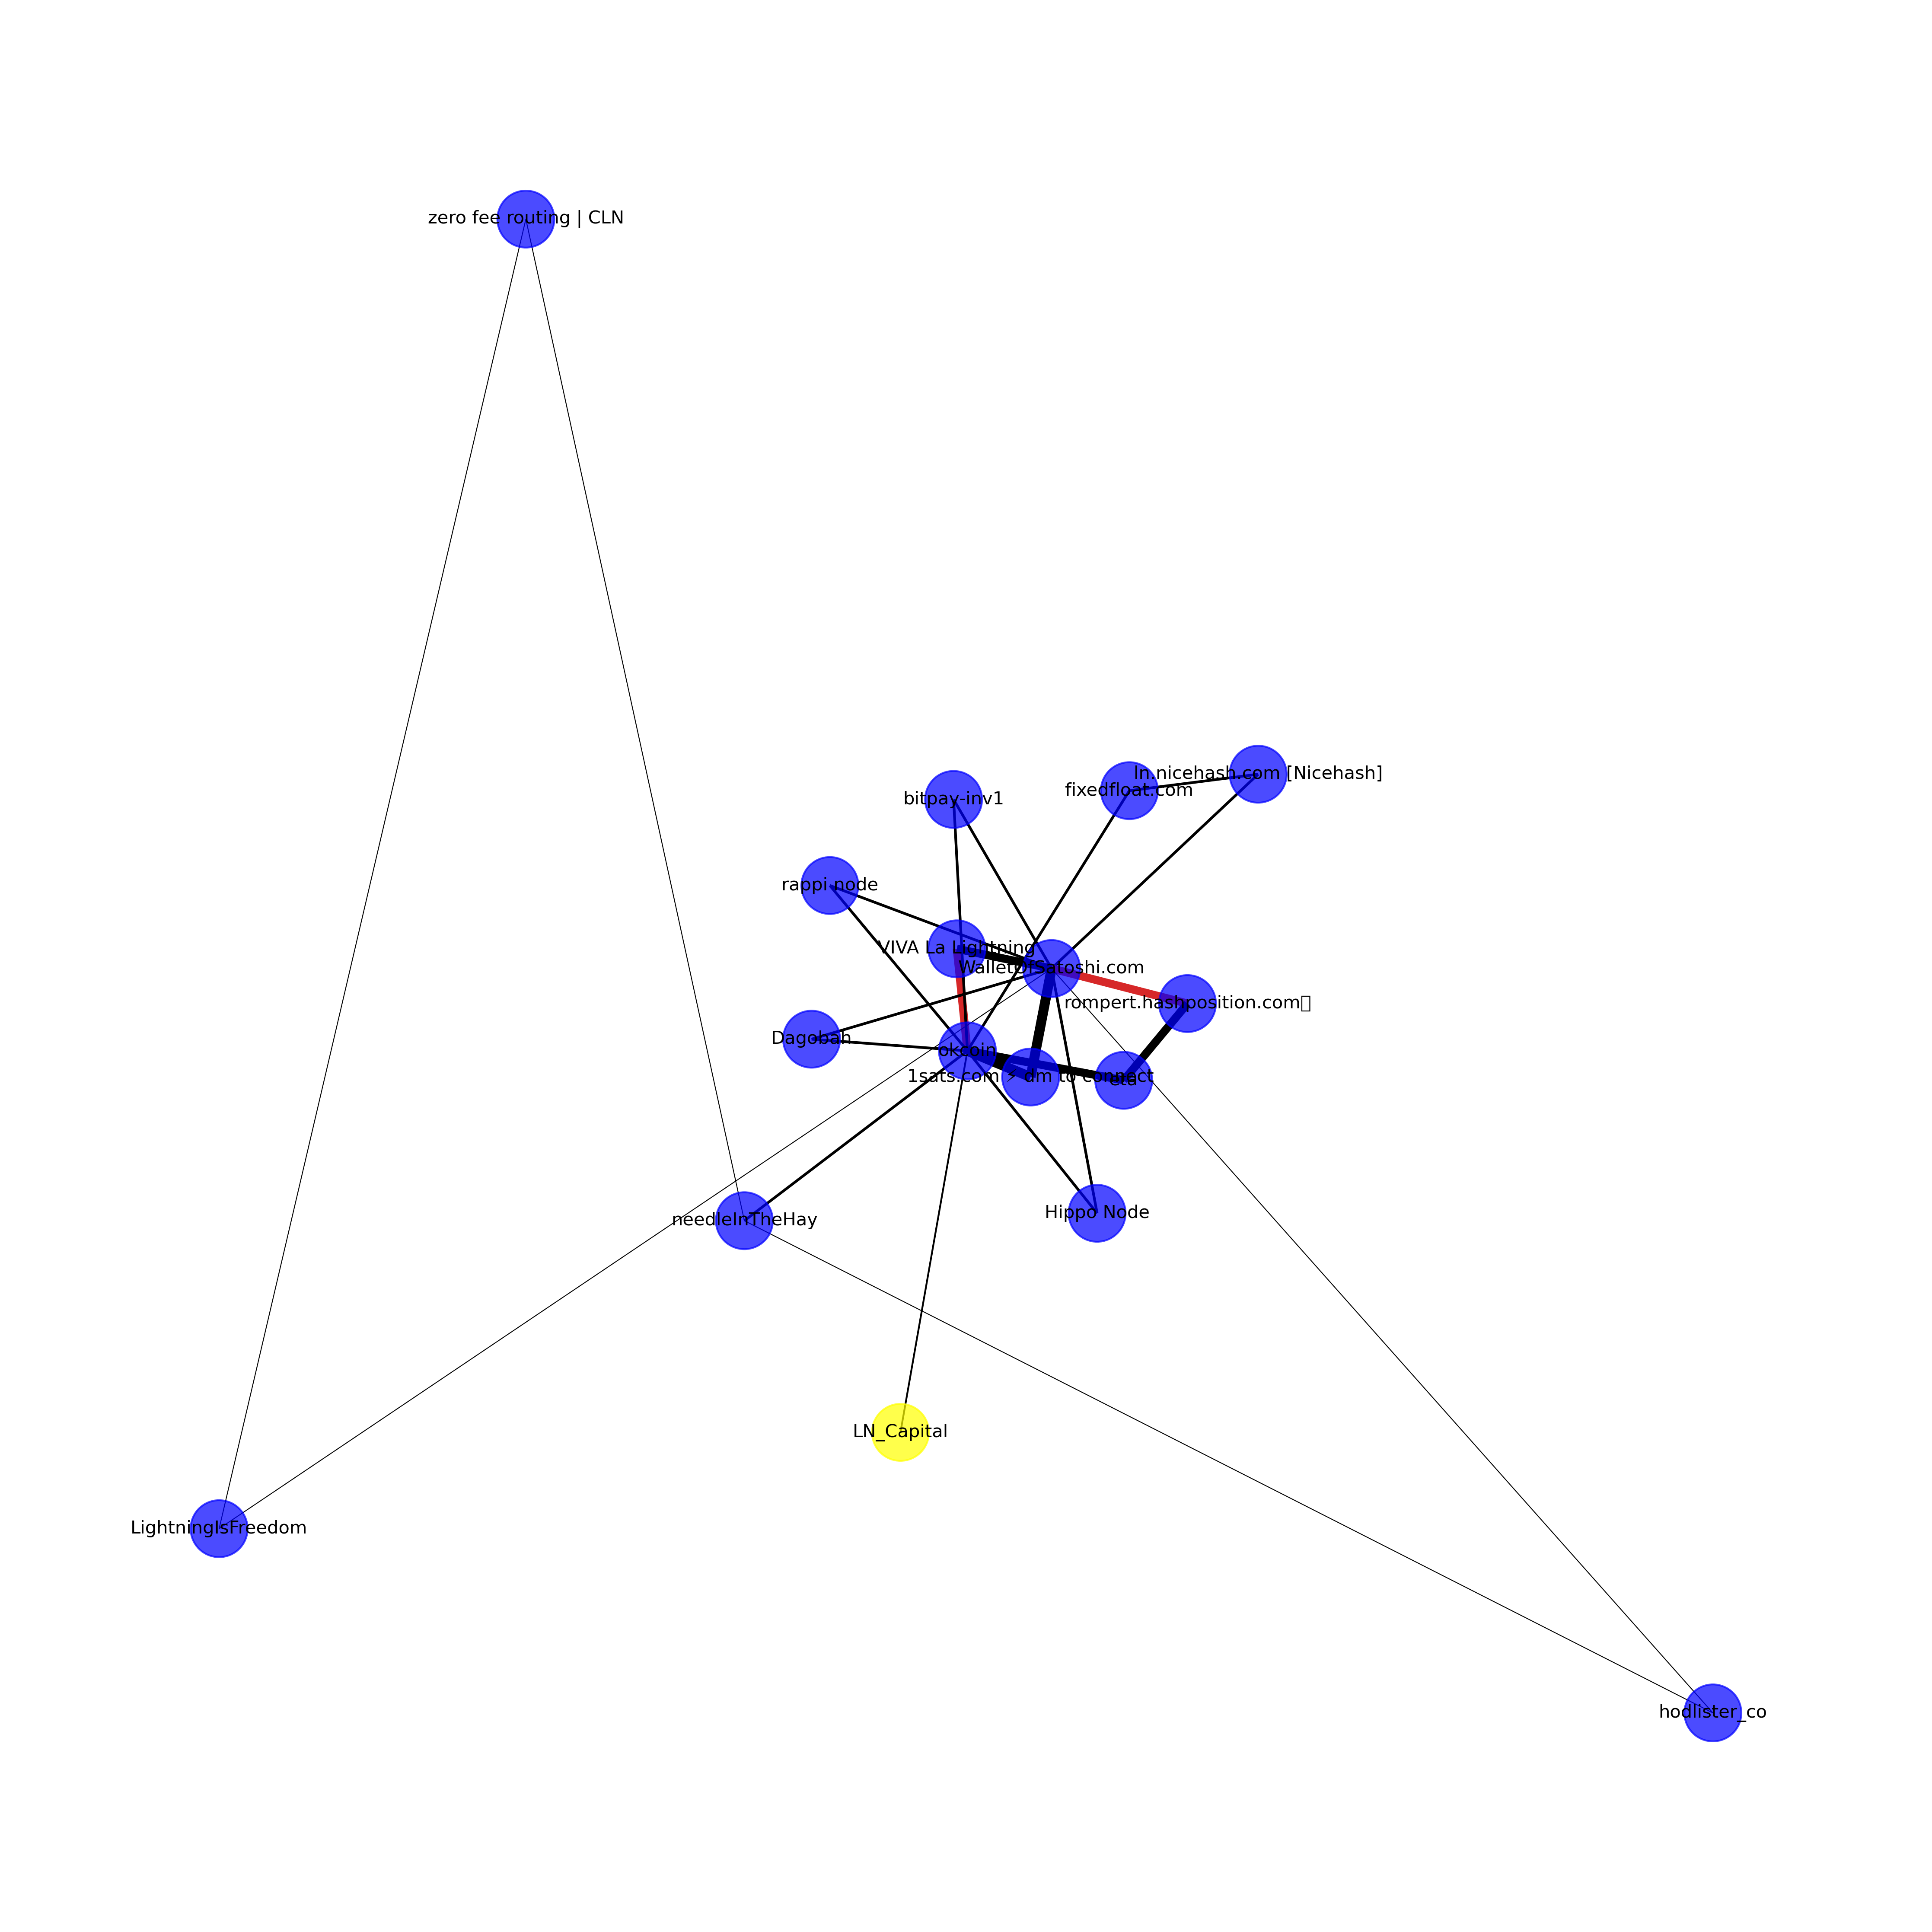

In [700]:
# displaying graph
plt.figure(figsize=(15,15))

widths = np.array([w for *_, w in G.edges.data('weight')])

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibi

# nodes
node_colors = np.array([col for *_, col in G.nodes.data('color')])
print(node_colors)

nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.7, node_color=node_colors)

# edges
colors = np.array(['tab:red' if w[2] >=1 else 'green' if s[2] == 1 else 'black' for w, s in zip(G.edges.data('fail_weight'), 
                                                                   G.edges.data('pay_status'))])
nx.draw_networkx_edges(G, pos, width=(widths+0.1)*5, edge_color=colors)  # using a 5x scale factor here

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

In [636]:
pos

{'okcoin': array([ 0.00395844, -0.00897015]),
 'VIVA La Lightning': array([-0.09291708,  0.09659441]),
 'WalletOfSatoshi.com': array([0.01692057, 0.08855433]),
 '1sats.com ⚡ dm to connect': array([-0.07615626, -0.03056684]),
 'fixedfloat.com': array([ 0.35105451, -0.05917774]),
 'ln.nicehash.com [Nicehash]': array([0.36804516, 0.13196199]),
 'needleInTheHay': array([-0.13946716, -0.32477031]),
 'zero fee routing | CLN': array([-0.47080981,  1.        ]),
 'LightningIsFreedom': array([-0.83011747, -0.62331644]),
 'eta': array([0.15733653, 0.02820737]),
 'rompert.hashposition.com🔵': array([0.15803124, 0.15035308]),
 'rappi node': array([-0.19185151,  0.22086259]),
 'hodlister_co': array([ 0.89571635, -0.76256445]),
 'bitpay-inv1': array([0.0164605 , 0.30267359]),
 'Hippo Node': array([ 0.08853035, -0.19889575]),
 'Dagobah': array([-0.25473436, -0.01094567])}

In [745]:
%%time
big_df = show_routes_of_payment(payment_atts.loc[(6577)])
i= 0
for p_id, new_df in payment_atts.loc[(6578):6608,:].groupby(level=0):
    to_append_df = show_routes_of_payment(new_df.droplevel(0))
    big_df = pd.concat([big_df, to_append_df])
    print(i)
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
CPU times: total: 3min 24s
Wall time: 3min 24s


In [747]:
big_df.loc[big_df['pay_status'].isna(), 'pay_status'] = 2

In [748]:
big_df.loc[big_df['weight'].isna(), 'weight'] = 0

In [749]:
big_df.isna().sum()

source         0
destination    0
weight         0
fail_weight    0
pay_status     0
dtype: int64

In [756]:
big_df

,source,destination,weight,fail_weight,pay_status
0,Ngu Technologies,zero fee routing | CLN,9,0,2.0
1,zero fee routing | CLN,₿itcoin-⚡️,1,0,2.0
2,₿itcoin-⚡️,WalletOfSatoshi.com,1,1,2.0
4,zero fee routing | CLN,zero fee routing [TigerNode],1,0,2.0
5,zero fee routing [TigerNode],WalletOfSatoshi.com,1,1,2.0
...,...,...,...,...,...
45,MrWasheeWashee,WalletOfSatoshi.com,1,1,2.0
47,ln2me.com / LightningTo.Me,CookieMonster,1,0,2.0
48,CookieMonster,ln.nicehash.com [Nicehash],1,1,2.0
51,DiamondHands💎🙌,BoxFish🐡,1,0,1.0


In [757]:
big_df['hop_peers'] = list(zip(big_df.source, big_df.destination))

In [781]:
big_df.head(2)

,source,destination,weight,fail_weight,pay_status,hop_peers
0,Ngu Technologies,zero fee routing | CLN,9,0,2.0,"(Ngu Technologies, zero fee routing | CLN)"
1,zero fee routing | CLN,₿itcoin-⚡️,1,0,2.0,"(zero fee routing | CLN, ₿itcoin-⚡️)"


In [766]:
aggregated_routes = big_df.groupby('hop_peers')

In [769]:
weights = aggregated_routes[['weight', 'fail_weight']].sum()

In [791]:
weights.sort_values(by='weight', ascending=False).head(2)

,weight,fail_weight
hop_peers,,
"(Ngu Technologies, zero fee routing | CLN)",58,1
"(southxchange.com, Ngu Technologies)",47,0


In [796]:
weights.describe()

,weight,fail_weight
count,616.000000,616.000000
mean,2.227273,0.675325
std,4.349784,1.108038
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
max,58.000000,13.000000


In [793]:
weights.sum()

weight         1372
fail_weight     416
dtype: int64

array([[<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'fail_weight'}>]], dtype=object)

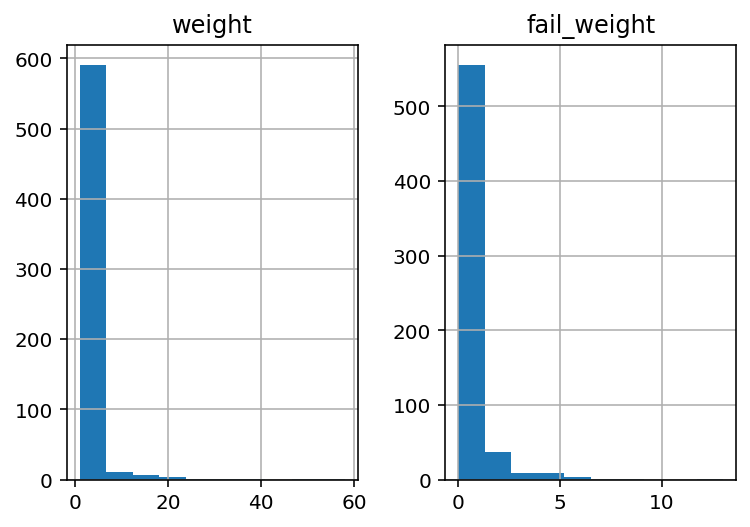

In [795]:
# Plotting occurrences vs failures of each channel (hop - pair of nodes)
weights.hist()

The information above may suggest that the failures concentrate in few channels. Also, that there are few channels that present a lot of activity, meanwhile most channels have low activity (only tried once).

Which nodes fail more often?

In [819]:
nodes_failures = big_df.groupby('source')['fail_weight'].sum()

In [ ]:
# outbound failures

In [826]:
nodes_failures.sort_values(ascending=False)[:10]

source
southxchange.com             131
⚡G-Spot-21_69_420⚡            11
rompert.hashposition.com🔵     10
bitpay-inv1                    7
02cea40d9abce36f1f8c           7
lightning-roulette.com         7
zero fee routing | CLN         6
Highway to Hell                6
rappi node                     6
gameb_2                        6
Name: fail_weight, dtype: int64

Which nodes have more activity?

In [821]:
# routing attempts per node
nodes_attempts = big_df.groupby('source')['weight'].sum()

In [845]:
nodes_attempts.loc['⚡G-Spot-21_69_420⚡']

15

In [828]:
nodes_attempts.sort_values(ascending=False)[:10]

source
southxchange.com                214
HoernchenLightning              116
Ngu Technologies                 95
zero fee routing | CLN           94
Milky Way                        85
BCash_Is_Trash                   41
SWISS.SOVEREIGN                  37
ln.nicehash.com [Nicehash]       27
BankoftheSovereignIndividual     23
bitpay-inv1                      23
Name: weight, dtype: int64

In [847]:
failure_rate = (nodes_failures / nodes_attempts)

In [849]:
failure_rate.loc[nodes_failures.sort_values(ascending=False)[:10].index]

source
southxchange.com             0.612150
⚡G-Spot-21_69_420⚡           0.733333
rompert.hashposition.com🔵    0.909091
bitpay-inv1                  0.304348
02cea40d9abce36f1f8c         0.875000
lightning-roulette.com       1.000000
zero fee routing | CLN       0.063830
Highway to Hell              1.000000
rappi node                   0.461538
gameb_2                      1.000000
dtype: float64

In [853]:
big_df.groupby('source')['hop_peers'].size().sort_values(ascending=False)

source
southxchange.com          118
zero fee routing | CLN     81
HoernchenLightning         45
BCash_Is_Trash             40
Ngu Technologies           35
                         ... 
Pleb_Node                   1
CookieMonster               1
Coincards                   1
Pretz                       1
Mowgli34.crypto             1
Name: hop_peers, Length: 296, dtype: int64

From above, we can see that the nodes that fail more often have a high failure rate

We can compute how many different channels a node has tried to send a paymento through.

In [855]:
num_channels_tried = big_df.groupby('source')['hop_peers'].size()

If we multiply a node's number of channels tried by its failure rate, we can approximate the number of channel that have failed from that node.

In [852]:
(failure_rate * num_channels_tried).sort_values(ascending=False)

source
southxchange.com                72.233645
⚡G-Spot-21_69_420⚡              10.266667
rompert.hashposition.com🔵        9.090909
lightning-roulette.com           7.000000
Highway to Hell                  6.000000
                                  ...    
OLYMPUS [zeusln.app]             0.000000
Obi-Wan Cryptobi                 0.000000
OrangePeace                      0.000000
Peace/Money | bit.ly/1kYb7a7     0.000000
Mowgli34.crypto                  0.000000
Length: 296, dtype: float64

In [771]:
fail_rate = weights['fail_weight'] / weights['weight']

In [773]:
fail_rate.sort_values()

hop_peers
(zero fee routing | CLN, 026beacefd5d37ba9696)    0.0
(Milky Way, lnurl-pay.me)                         0.0
(Milky Way, lightning-roulette.com)               0.0
(Milky Way, gameb_2)                              0.0
(Milky Way, gameb_1)                              0.0
                                                 ... 
(THNDR GAMES, Playbot.eu)                         1.0
(THNDR GAMES, Lucky.Dog)                          1.0
(THNDR GAMES, CryptoChill)                        1.0
(StrackLightning, WalletOfSatoshi.com)            1.0
(🧀 Cheese, ln.nicehash.com [Nicehash])            1.0
Length: 616, dtype: float64

In [720]:
x = big_df.drop_duplicates(subset=['source', 'destination'])

In [721]:
x

,source,destination,weight,fail_weight,pay_status
0,Ngu Technologies,zero fee routing | CLN,1.000000,0.000000,2.0
1,zero fee routing | CLN,₿itcoin-⚡️,0.000000,0.000000,2.0
2,₿itcoin-⚡️,WalletOfSatoshi.com,0.000000,1.000000,2.0
3,zero fee routing | CLN,zero fee routing [TigerNode],0.000000,0.000000,2.0
4,zero fee routing [TigerNode],WalletOfSatoshi.com,0.000000,1.000000,2.0
...,...,...,...,...,...
16,southxchange.com,firi.com,0.333333,0.428571,2.0
17,firi.com,WalletOfSatoshi.com,0.333333,0.000000,2.0
18,southxchange.com,Dagnela 🦄 Hunter,0.000000,0.142857,2.0
19,Dagnela 🦄 Hunter,HoernchenLightning,0.000000,0.000000,2.0


In [729]:
# creating graph form graph df
G = nx.from_pandas_edgelist(big_df, source='source', target='destination',
                        edge_attr=['weight', 'fail_weight', 'pay_status'])
nx.set_node_attributes(G, 'green', 'color')
# sender (our node)
G.nodes['LN_Capital']['color'] = 'yellow'
# destination 
node_dest = 'WalletOfSatoshi.com'
G.nodes[node_dest]['color'] = 'purple'

In [ ]:
ro

['green' 'green' 'green' 'purple' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'yellow' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green']


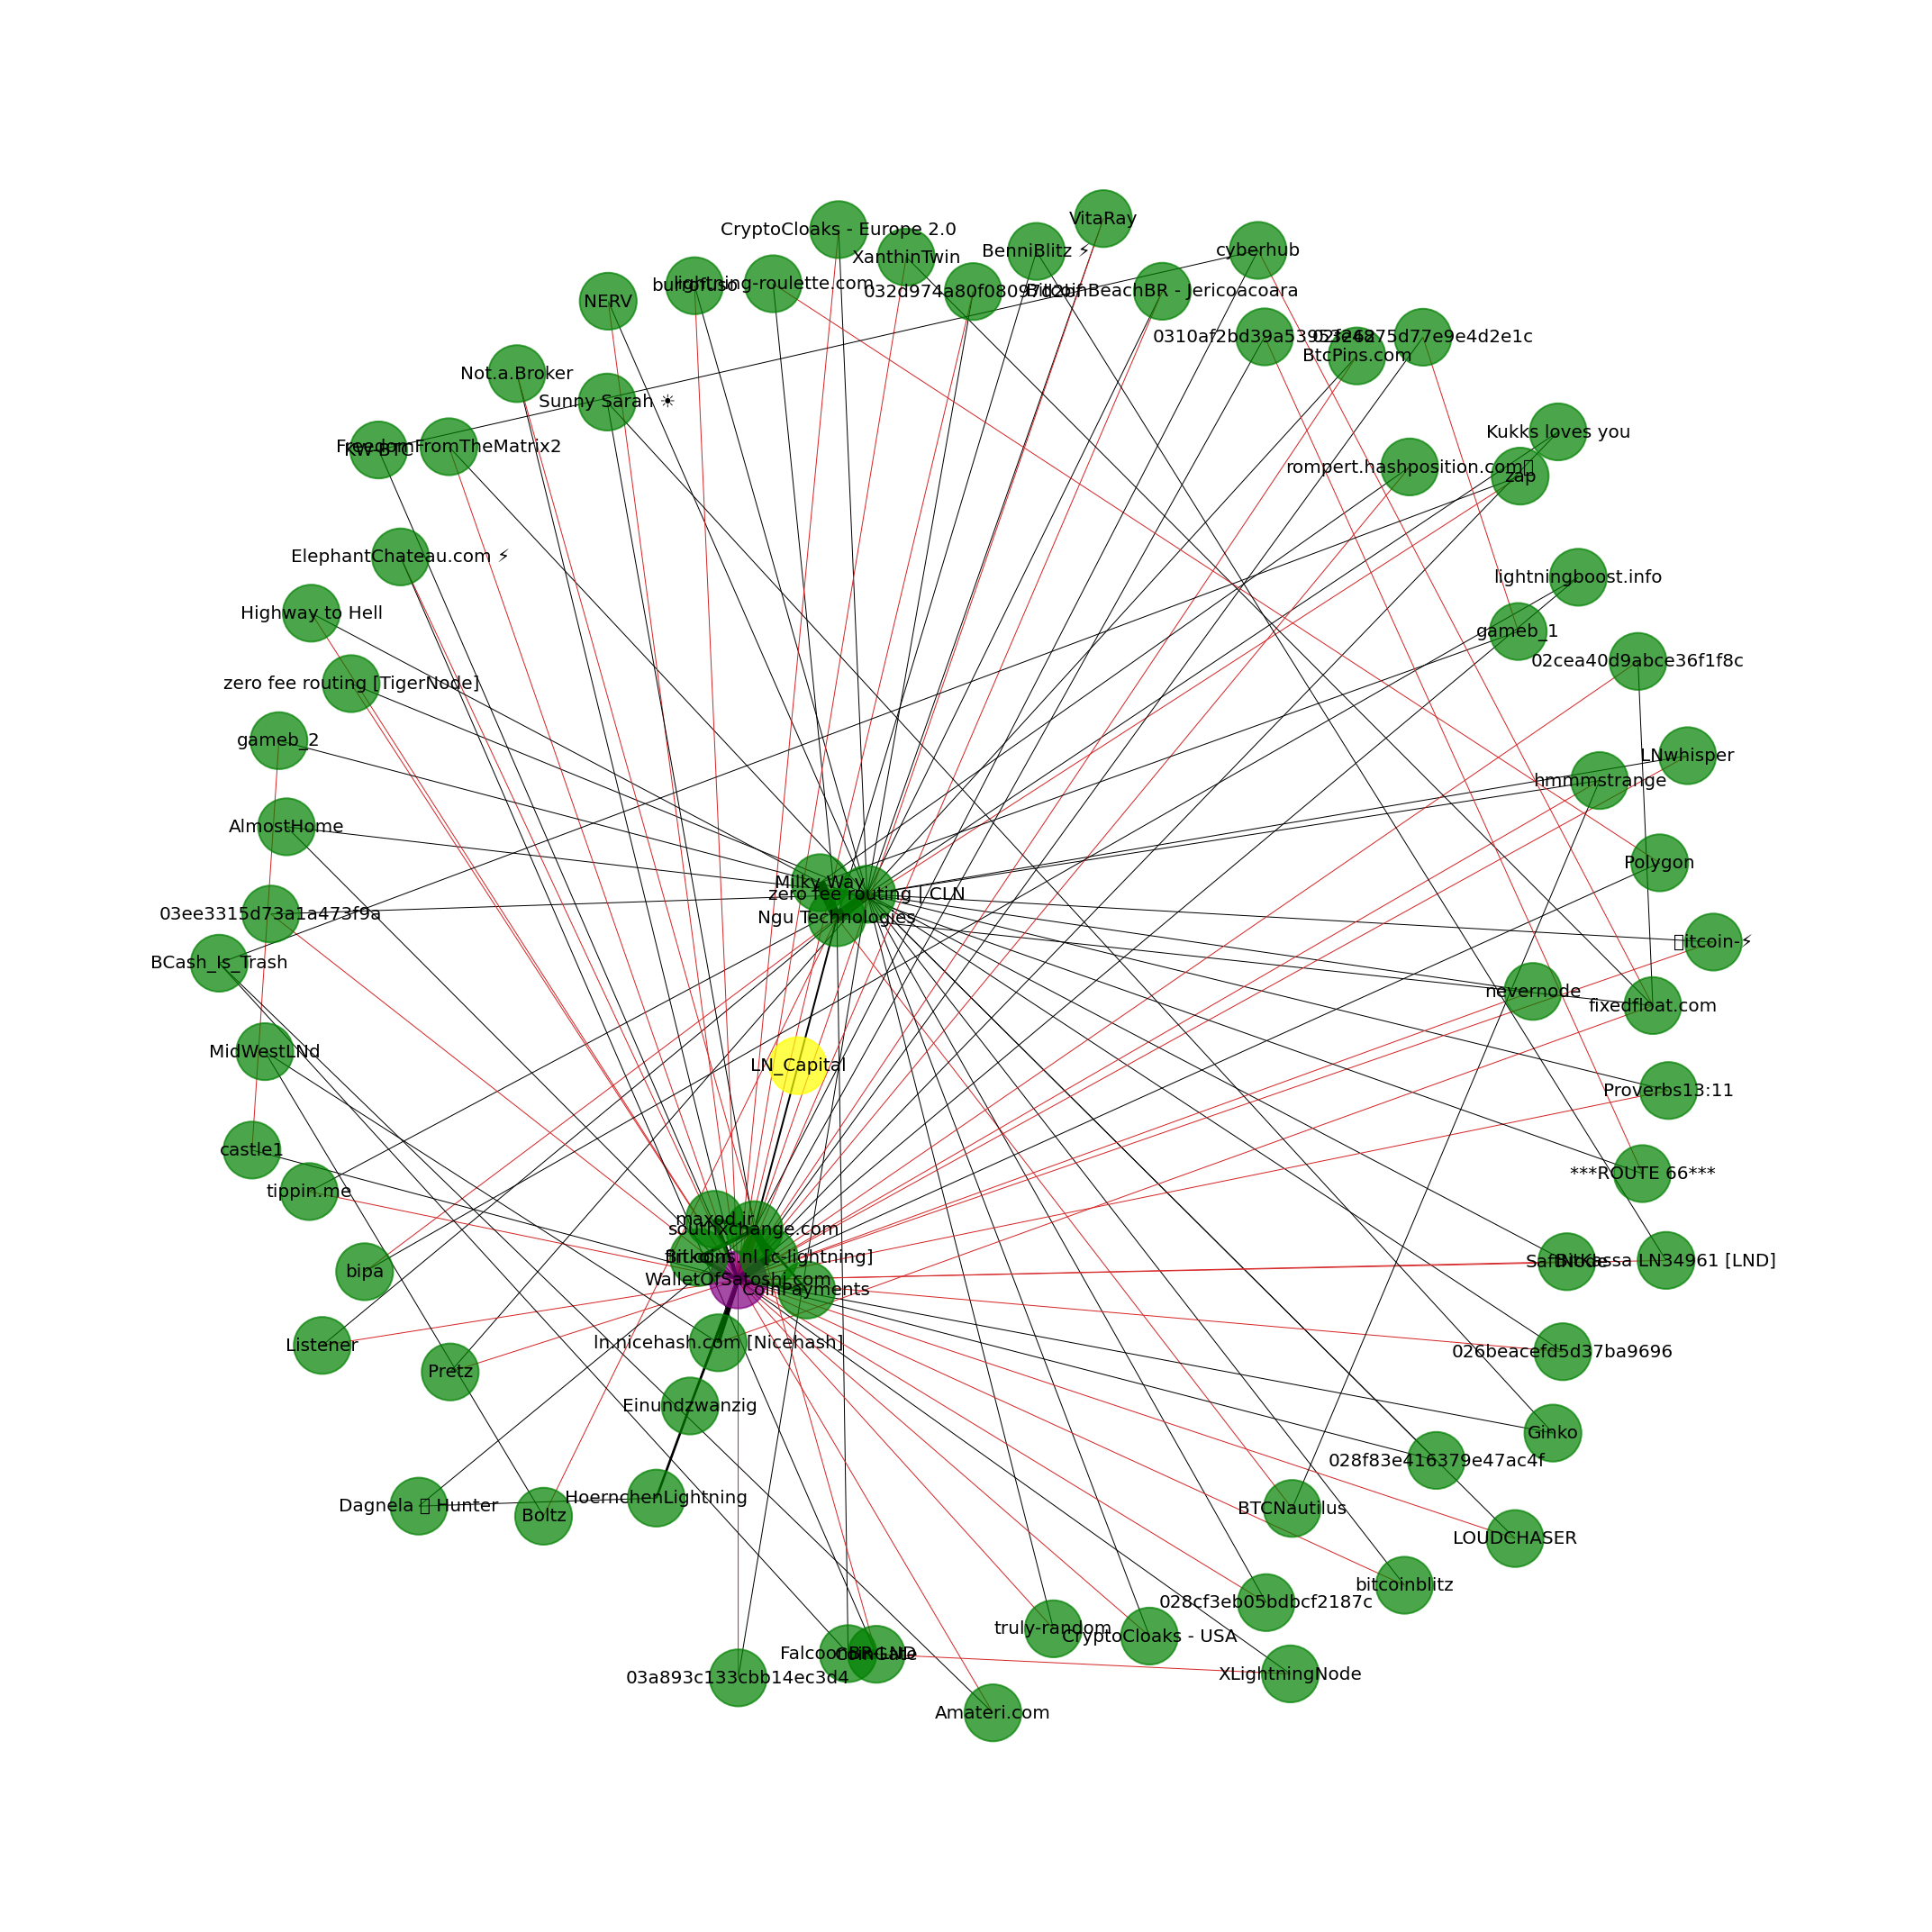

In [730]:
# displaying graph
plt.figure(figsize=(15,15))

widths = np.array([w for *_, w in G.edges.data('weight')])

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibi

# nodes
node_colors = np.array([col for *_, col in G.nodes.data('color')])
print(node_colors)

nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.7, node_color=node_colors)

# edges
colors = np.array(['tab:red' if w[2] >=1 else 'green' if s[2] == 1 else 'black' for w, s in zip(G.edges.data('fail_weight'), 
                                                                   G.edges.data('pay_status'))])
nx.draw_networkx_edges(G, pos, width=(widths+0.1)*5, edge_color=colors)  # using a 5x scale factor here

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

In [619]:
pos

{'Ngu Technologies': array([nan, nan]),
 'zero fee routing | CLN': array([nan, nan]),
 '₿itcoin-⚡️': array([nan, nan]),
 'WalletOfSatoshi.com': array([nan, nan]),
 'zero fee routing [TigerNode]': array([nan, nan]),
 'BtcPins.com': array([nan, nan]),
 '03a893c133cbb14ec3d4': array([nan, nan]),
 'NERV': array([nan, nan]),
 'tippin.me': array([nan, nan]),
 'LOUDCHASER': array([nan, nan]),
 'VitaRay': array([nan, nan]),
 'AlmostHome': array([nan, nan]),
 'BitcoinBeachBR - Jericoacoara': array([nan, nan]),
 'SaftNode': array([nan, nan]),
 '03ee3315d73a1a473f9a': array([nan, nan]),
 'nevernode': array([nan, nan]),
 'burrofuso': array([nan, nan]),
 '026beacefd5d37ba9696': array([nan, nan]),
 'CryptoCloaks - USA': array([nan, nan]),
 'truly-random': array([nan, nan]),
 '028f83e416379e47ac4f': array([nan, nan]),
 '032d974a80f08097d2bf': array([nan, nan]),
 'CryptoCloaks - Europe 2.0': array([nan, nan]),
 'FreedomFromTheMatrix2': array([nan, nan]),
 'BTCNautilus': array([nan, nan]),
 'hmmmstrang

In [663]:
GG = nx.Graph()

In [664]:
GG.add_node('LN_Capital')

In [666]:
GG.add_node('Ngu')

In [667]:
GG.add_edge('LN_Capital', 'Ngu')

{'LN_Capital': Text(0.35177412304168737, -1.0, 'LN_Capital'),
 'Ngu': Text(-0.35177412304168737, 1.0, 'Ngu')}

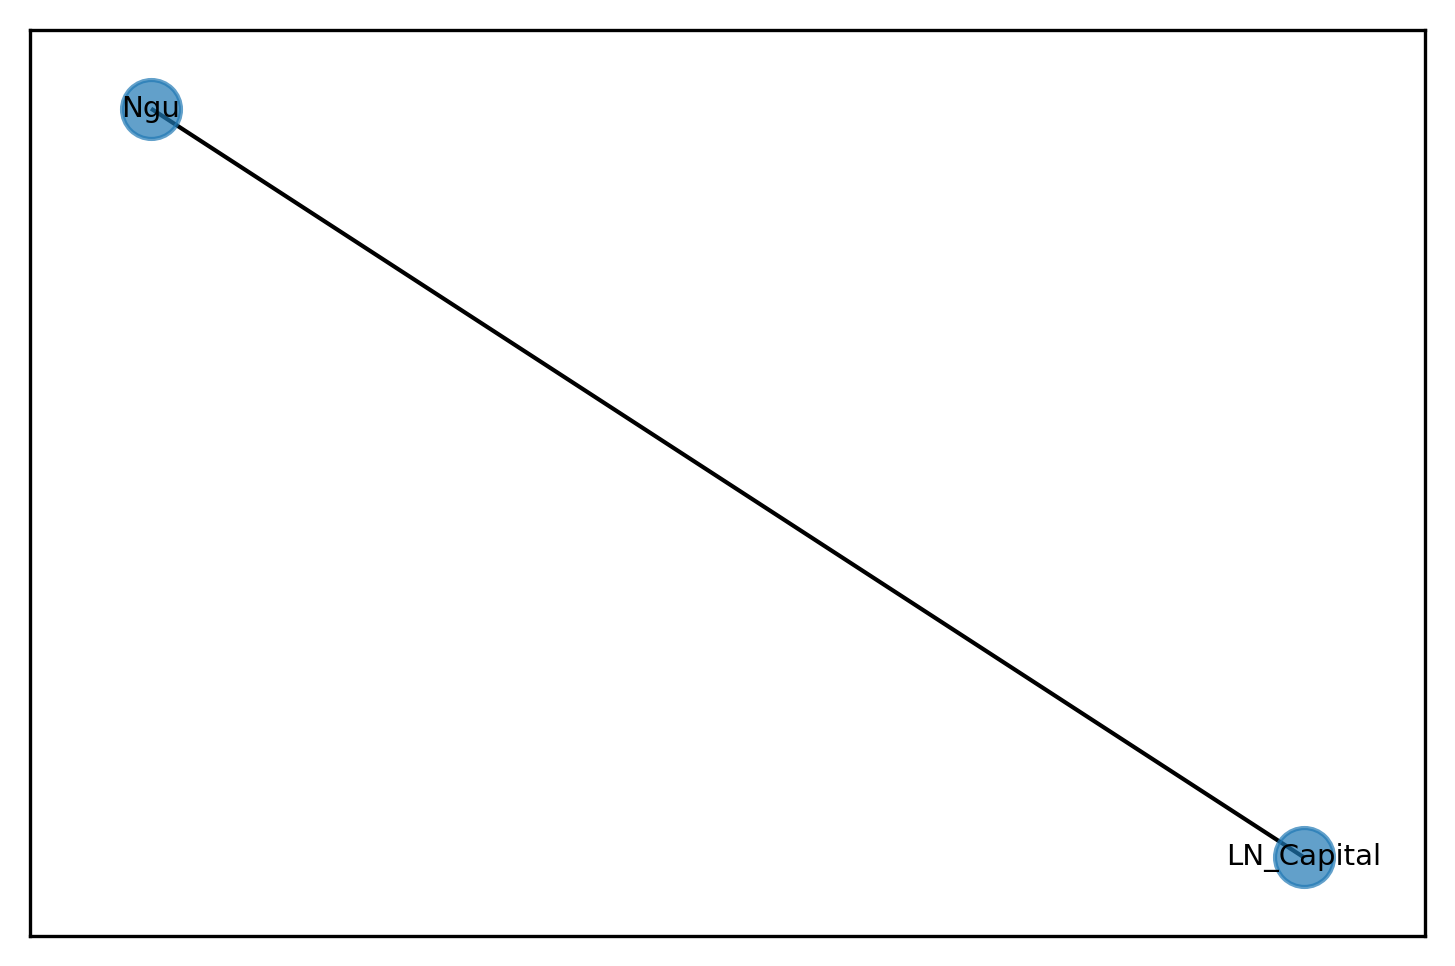

In [675]:
po = nx.spring_layout(GG)
nx.draw_networkx_nodes(GG, po, node_size=200, alpha=0.7)

nx.draw_networkx_edges(GG, po)  # using a 5x scale factor here
# labels

nx.draw_networkx_labels(GG, po, font_size=7, font_family="sans-serif")